In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!gdown --id 1o0D7vnGUZHS72is6n1jV1ge2BDfObzVi

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1o0D7vnGUZHS72is6n1jV1ge2BDfObzVi
To: /content/accidents.zip
100% 7.91G/7.91G [02:00<00:00, 65.7MB/s]


In [ ]:
!unzip /content/drive/MyDrive/FinalAccident/Dataset.zip -d '/content/drive/MyDrive/FinalAccident/'

In [ ]:
import os
import cv2
import glob
import os.path
import skimage
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.callbacks import ModelCheckpoint
from keras.models import load_model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions

from skimage import transform
import skimage
from skimage import io


In [ ]:
import os

data_path = '/content/drive/MyDrive/FinalAccident/Dataset/Training dataset/'
categories_list = os.listdir(data_path)

In [ ]:
categories_list

['Accident', 'No Accident']

In [ ]:
categories_list.remove('.ipynb_checkpoints')

In [ ]:
import cv2
import skimage
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np
from tensorflow.keras.utils import to_categorical as convert_to_categorical
import glob as file_glob

# Custom function to process an image file
def process_image_file(image_file_path, class_labels_list):
    # Read the image file
    image_data = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to a specific dimension
    resized_image = skimage.transform.resize(image_data, (128, 128, 3))

    # Convert the resized image to an array
    transformed_image_array = keras_image.img_to_array(resized_image)

    # Extract the label name from the file path
    label_name = (image_file_path.split("/"))[-2]

    # Find the index of the label in the class labels list
    label_position = class_labels_list.index(label_name)

    return transformed_image_array, label_position

# Custom function to load and process data from a specified path
def load_and_process_data_from_path(data_directory_path, class_labels_list):
    x_data_list = []
    y_data_list = []

    # Fetch all image files from the data directory path
    image_files_list = file_glob.glob(data_directory_path + "/**/*")

    # Process each image file
    for image_file in image_files_list:
      try:
        transformed_image, label_index = process_image_file(image_file, class_labels_list)
        x_data_list.append(transformed_image)
        y_data_list.append(label_index)
      except:pass

    return np.array(x_data_list), convert_to_categorical(y_data_list)

In [ ]:
X_train,Y_train = load_and_process_data_from_path("/content/drive/MyDrive/FinalAccident/Dataset/Training dataset", categories_list)


In [ ]:
X_test, Y_test = load_and_process_data_from_path("/content/drive/MyDrive/FinalAccident/Dataset/Testing dataset", categories_list)

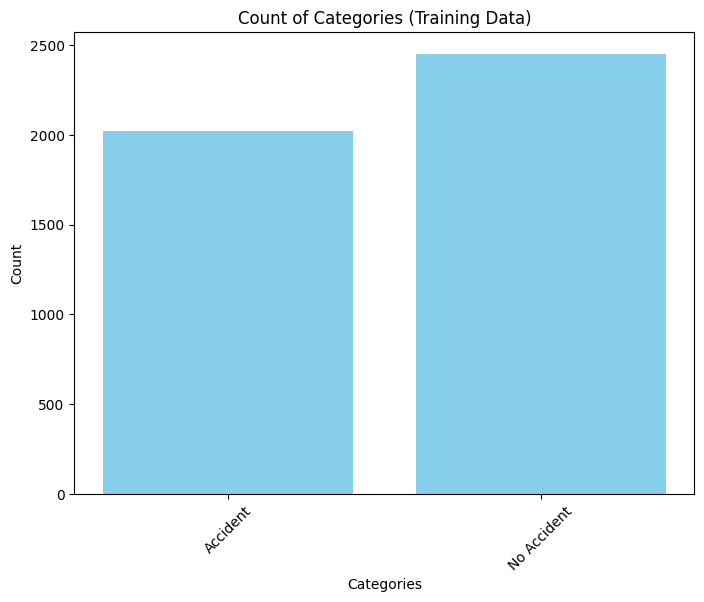

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Deriving categories count from Y_labels
categories_count = np.sum(Y_train, axis=0)  # Assuming Y_labels is in the one-hot encoded form

# Bar Graph
plt.figure(figsize=(8, 6))
plt.bar(categories_list, categories_count, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categories (Training Data)')
plt.xticks(rotation=45)
plt.show()




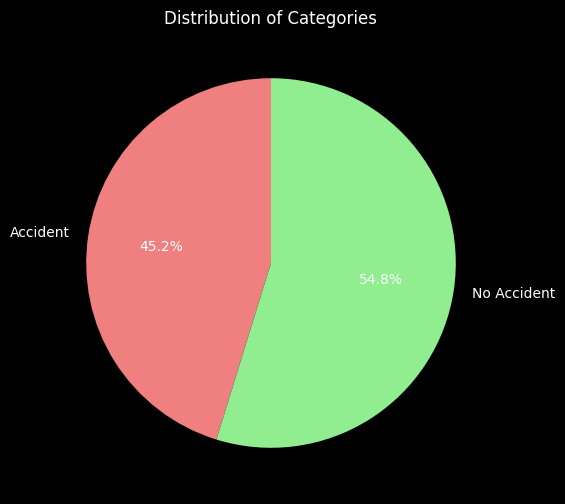

In [ ]:
# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(categories_count, labels=categories_list, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'yellow', 'skyblue'])
plt.title('Distribution of Categories')
plt.show()

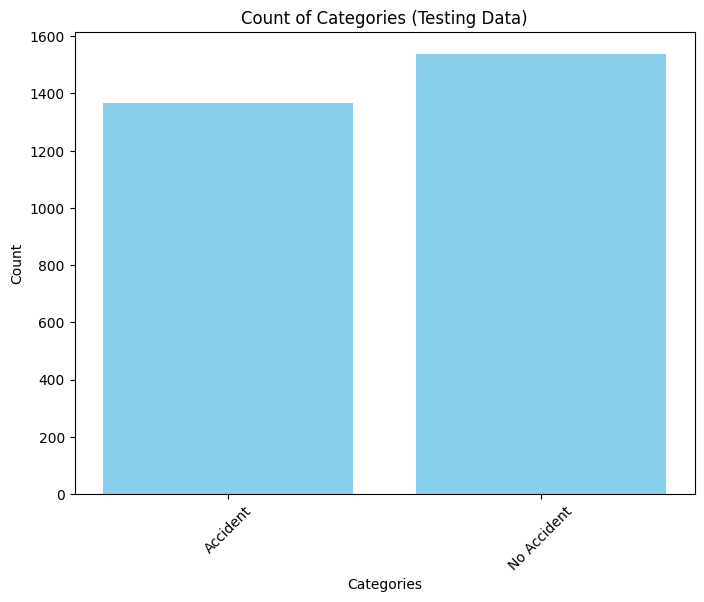

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Deriving categories count from Y_labels
categories_count1 = np.sum(Y_test, axis=0)  # Assuming Y_labels is in the one-hot encoded form

# Bar Graph
plt.figure(figsize=(8, 6))
plt.bar(categories_list, categories_count1, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categories (Testing Data)')
plt.xticks(rotation=45)
plt.show()



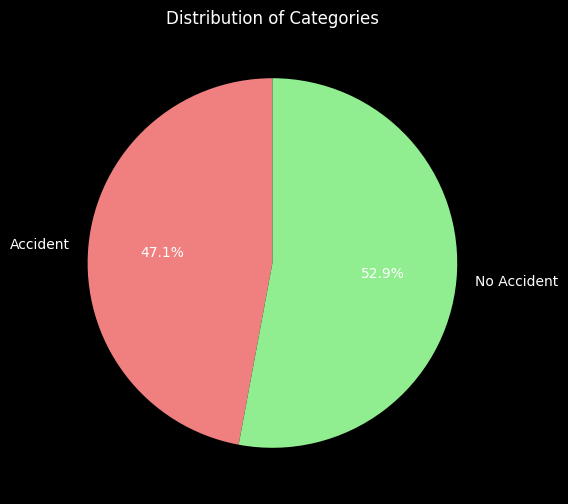

In [ ]:
# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(categories_count1, labels=categories_list, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'yellow', 'skyblue'])
plt.title('Distribution of Categories')
plt.show()

In [ ]:
print("Type of Y_train: ", type(Y_train))
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_train: ", X_train.shape)

print("Shape of Y_test: ", Y_test.shape)
print("Shape of X_test: ", X_test.shape)

Type of Y_train:  <class 'numpy.ndarray'>
Shape of Y_train:  (4473, 2)
Shape of X_train:  (4473, 128, 128, 3)
Shape of Y_test:  (2906, 2)
Shape of X_test:  (2906, 128, 128, 3)


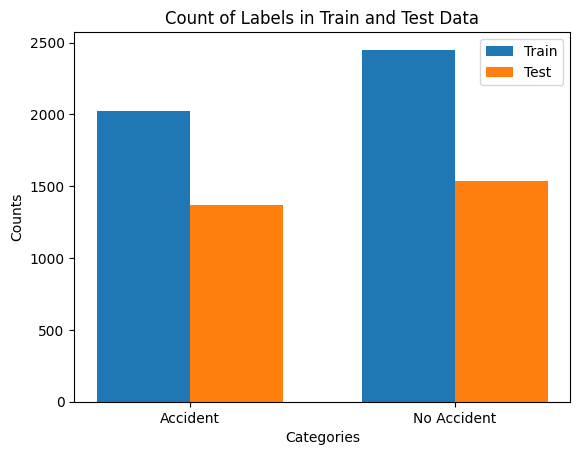

In [ ]:
import matplotlib.pyplot as plt

# Assuming Y_train is a one-hot encoded array
label_counts_train = Y_train.sum(axis=0)
label_counts_test = Y_test.sum(axis=0)

# Plotting the bar graph
fig, ax = plt.subplots()
index = range(len(categories_list))
bar_width = 0.35

rects1 = ax.bar(index, label_counts_train, bar_width, label='Train')
rects2 = ax.bar([i + bar_width for i in index], label_counts_test, bar_width, label='Test')

ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Count of Labels in Train and Test Data')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories_list)
ax.legend()

plt.show()

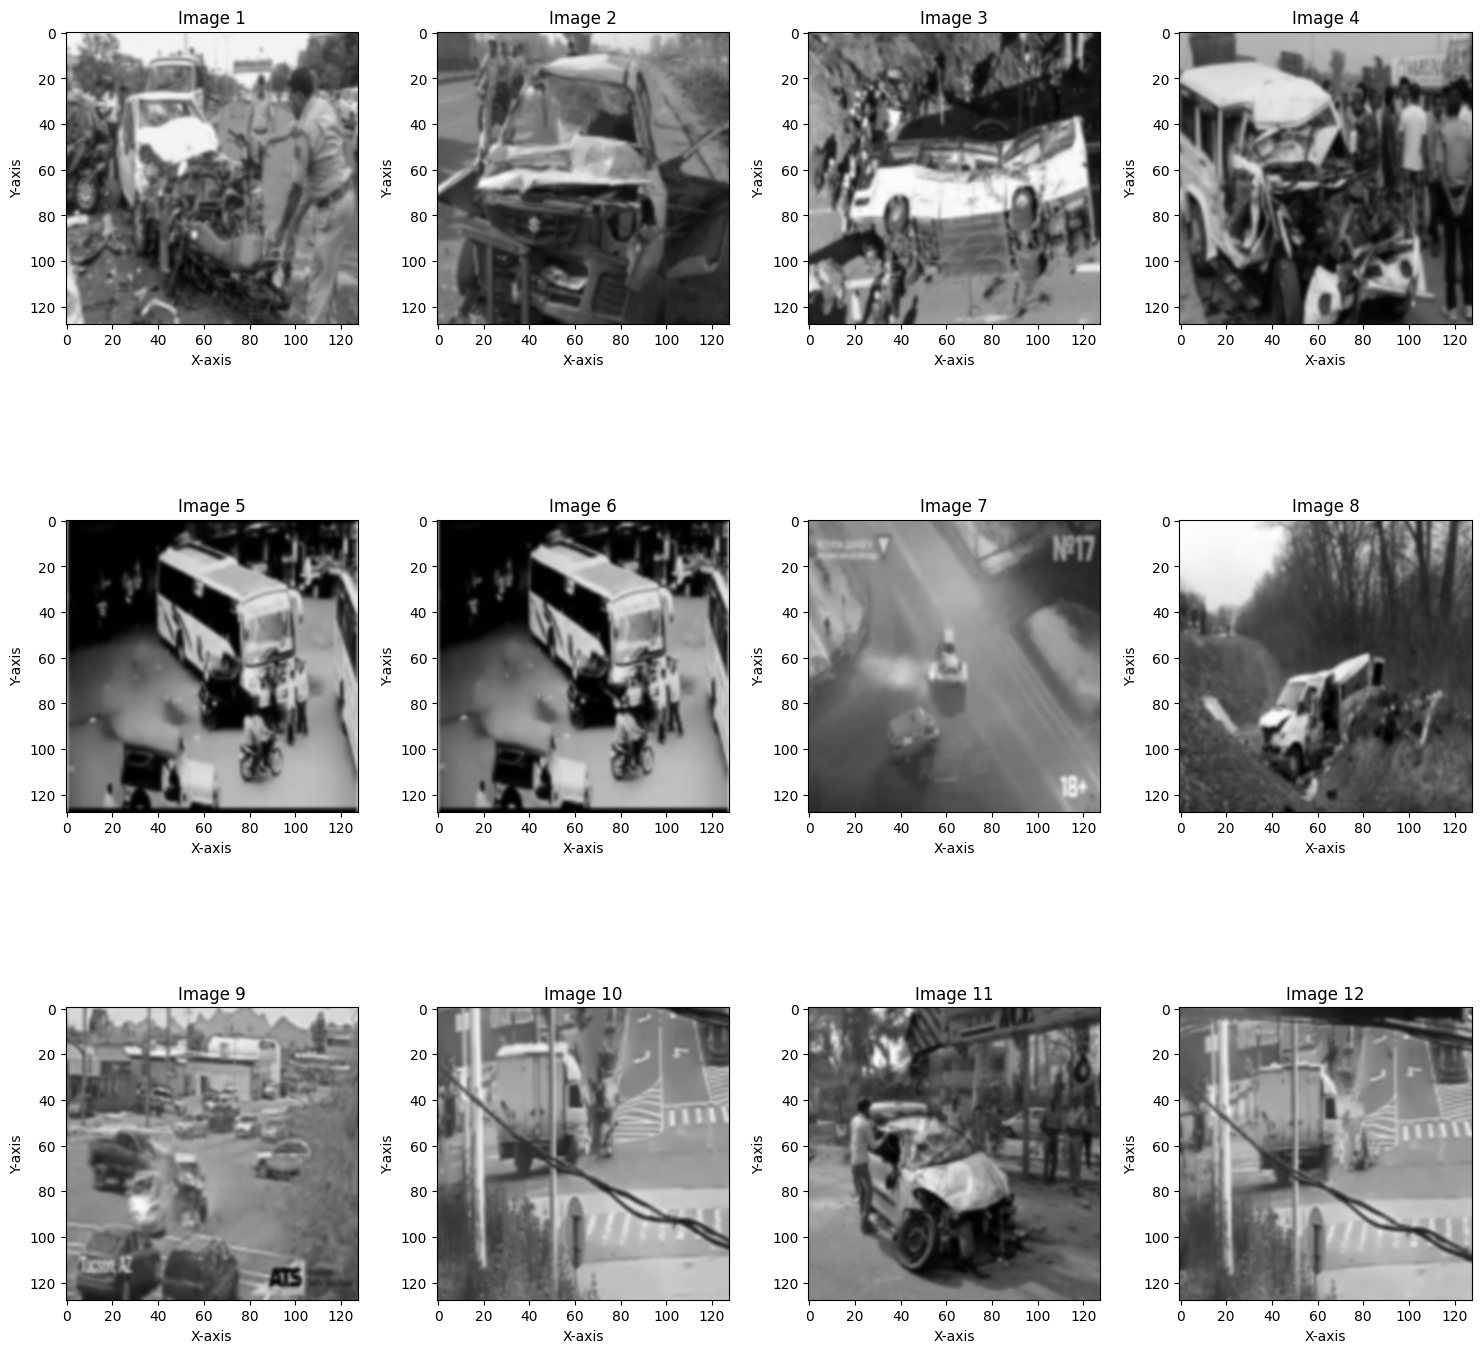

In [ ]:
import matplotlib.pyplot as plt

width = 100
height = 100
figure = plt.figure(figsize=(15, 15))
num_columns = 4
num_rows = 3

for i in range(1, num_columns * num_rows + 1):
    axis = figure.add_subplot(num_rows, num_columns, i)
    # axis.title.set_text(Y_train[i])  # You may need to modify this line accordingly
    plt.imshow(X_train[i], interpolation='bicubic')  # Modified interpolation method
    plt.xlabel('X-axis')  # Add x-axis label
    plt.ylabel('Y-axis')  # Add y-axis label
    plt.title('Image {}'.format(i))  # Add a title for each image

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

img_size = 128

new_model = Sequential()
new_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Conv2D(64, (3, 3), activation='relu'))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Conv2D(128, (3, 3), activation='relu'))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Conv2D(256, (3, 3), activation='relu'))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Flatten())
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.3))
new_model.add(Dense(len(categories_list), activation='softmax'))
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(filepath='best_model.h5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)

# Train the model with the ModelCheckpoint callback
training_history = new_model.fit(X_train, Y_train,
                                batch_size=32,
                                epochs=100,
                                shuffle=True,
                                validation_data=(X_test, Y_test),
                                callbacks=[model_checkpoint],
                                verbose=1)

Epoch 1/100
140/140 [==============================] - ETA: 0s - loss: 0.5706 - accuracy: 0.6785
Epoch 1: val_accuracy improved from -inf to 0.79353, saving model to best_model.h5
140/140 [==============================] - 16s 54ms/step - loss: 0.5706 - accuracy: 0.6785 - val_loss: 0.4319 - val_accuracy: 0.7935
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


138/140 [============================>.] - ETA: 0s - loss: 0.3995 - accuracy: 0.8216
Epoch 2: val_accuracy improved from 0.79353 to 0.80351, saving model to best_model.h5
140/140 [==============================] - 5s 34ms/step - loss: 0.3973 - accuracy: 0.8220 - val_loss: 0.3834 - val_accuracy: 0.8035
Epoch 3/100
138/140 [============================>.] - ETA: 0s - loss: 0.3030 - accuracy: 0.8725
Epoch 3: val_accuracy improved from 0.80351 to 0.81900, saving model to best_model.h5
140/140 [==============================] - 4s 32ms/step - loss: 0.3032 - accuracy: 0.8719 - val_loss: 0.3662 - val_accuracy: 0.8190
Epoch 4/100
138/140 [============================>.] - ETA: 0s - loss: 0.2193 - accuracy: 0.9139
Epoch 4: val_accuracy did not improve from 0.81900
140/140 [==============================] - 4s 29ms/step - loss: 0.2194 - accuracy: 0.9137 - val_loss: 0.3819 - val_accuracy: 0.8169
Epoch 5/100
139/140 [============================>.] - ETA: 0s - loss: 0.1854 - accuracy: 0.9301
Epoch

In [ ]:
from sklearn.metrics import accuracy_score
loaded_model = load_model('best_model.h5')
y_predicted = loaded_model.predict(X_test)
y_predicted = (y_predicted > 0.5)
accuracy = accuracy_score(y_predicted, Y_test)
print("Accuracy with test data: ", accuracy * 100, "%")

91/91 [==============================] - 1s 9ms/step
Accuracy with test data:  86.40743289745355 %


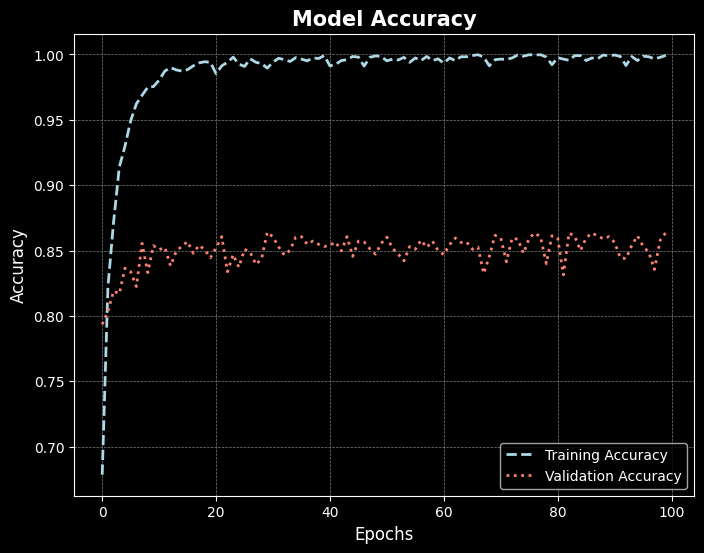

In [ ]:
# Setting the plot style
plt.style.use('dark_background')

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.plot(training_history.history['accuracy'], label='Training Accuracy', color='lightblue', linestyle='dashed', linewidth=2)
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='salmon', linestyle='dotted', linewidth=2)
plt.title('Model Accuracy', fontsize=15, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

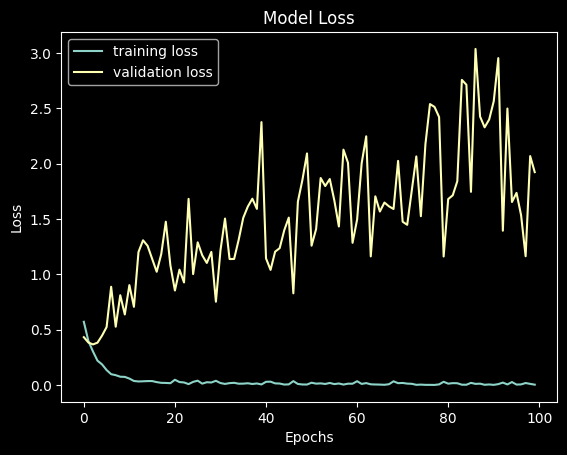

In [ ]:
# Plotting the loss
plt.figure(1)
plt.plot(training_history.history['loss'], label='training loss')  # Changed 'history' to 'training_history'
plt.plot(training_history.history['val_loss'], label='validation loss')  # Changed 'history' to 'training_history'
plt.title('Model Loss')  # Modified the title
plt.xlabel('Epochs')  # Modified the x-label
plt.ylabel('Loss')  # Modified the y-label
plt.legend()
plt.show()


In [ ]:
# Serialize the model to JSON
model_json = new_model.to_json()
with open("new_model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
new_model.save_weights("new_model_weights.h5")
new_model.save('new_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

print(new_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

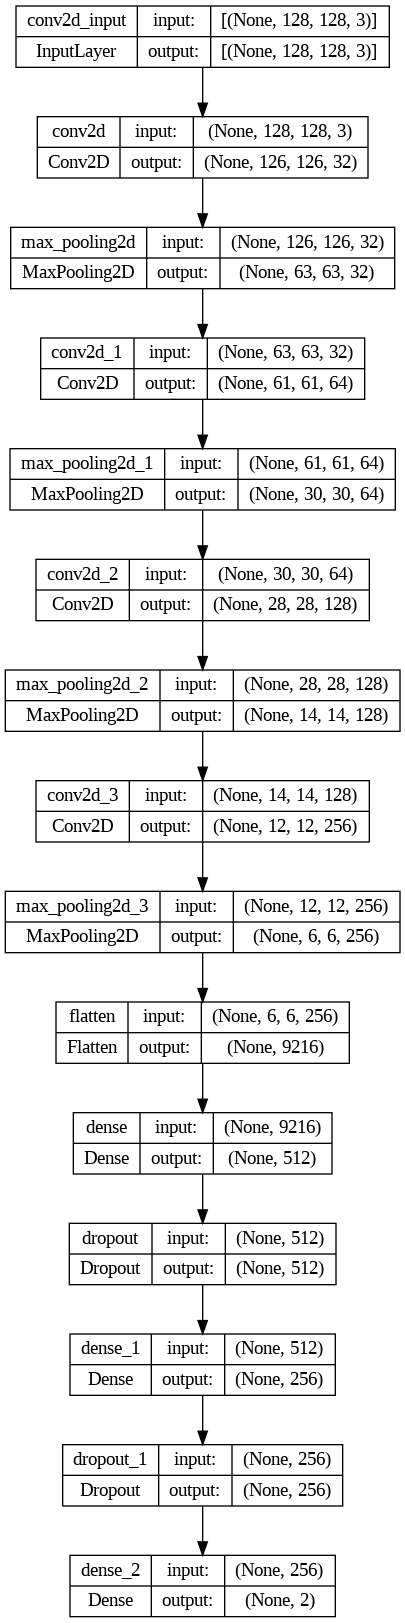

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture as a PNG image
plot_model(new_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
loaded_model = load_model('best_model.h5')

In [ ]:
def predict_accident(file_path, trained_model, categories_list):
    img_data = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    resized_img = skimage.transform.resize(img_data, (128, 128, 3))
    x_input = image.img_to_array(resized_img)

    x_input = np.expand_dims(x_input, axis=0)

    predictions = trained_model.predict(x_input, batch_size=None, verbose=1)
    predicted_labels = np.argmax(predictions, axis=-1)
    print("\nPREDICTION : " + categories_list[predicted_labels[0]])

    # Convert BGR to RGB for displaying
    img_data_rgb = cv2.imread(file_path, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_data_rgb)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


1/1 [==============================] - 1s 1s/step

PREDICTION : Accident


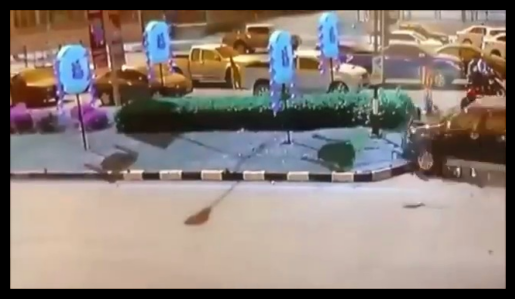

In [ ]:
predict_accident("/content/drive/MyDrive/FinalAccident/Dataset/Testing dataset/Accident/0.jpg",loaded_model,categories_list)

1/1 [==============================] - 0s 90ms/step

PREDICTION : Accident


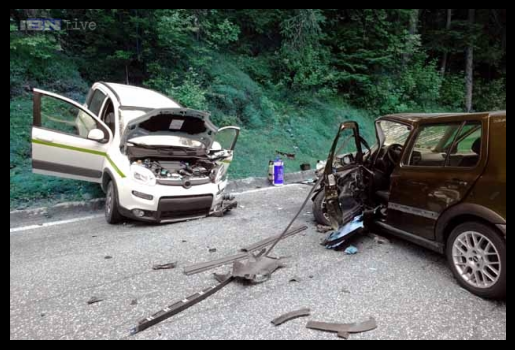

In [ ]:
predict_accident("/content/drive/MyDrive/FinalAccident/Dataset/Testing dataset/Accident/18.road-accident.jpg",loaded_model,categories_list)

1/1 [==============================] - 0s 28ms/step

PREDICTION : No Accident


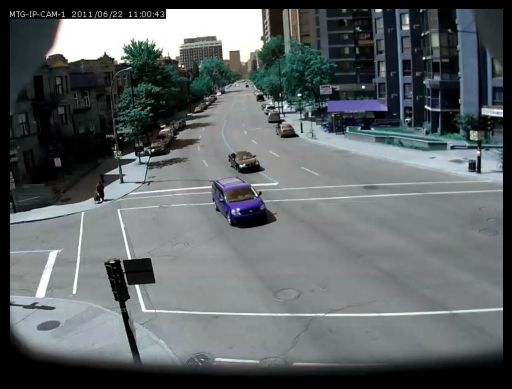

In [ ]:
predict_accident("/content/drive/MyDrive/FinalAccident/Dataset/Testing dataset/No Accident/00000122.jpg",loaded_model,categories_list)

1/1 [==============================] - 0s 19ms/step

PREDICTION : No Accident


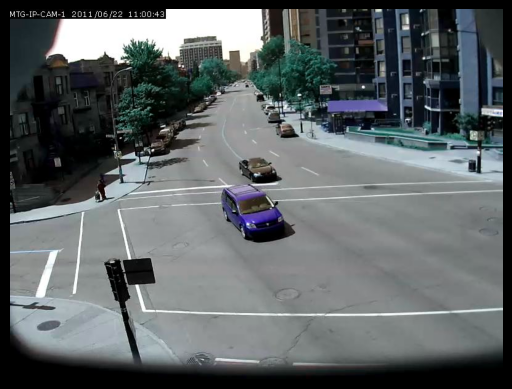

In [ ]:
predict_accident("/content/drive/MyDrive/FinalAccident/Dataset/Testing dataset/No Accident/00000131.jpg",loaded_model,categories_list)